In [80]:
import pandas as pd
target = pd.read_csv("./training_set_labels.csv", index_col=0)
target.shape

(26707, 2)

In [81]:
# Features
features = pd.read_csv("./training_set_features.csv", index_col=0)
features.shape

(26707, 35)

In [82]:
# this is for submission
test_set_features = pd.read_csv("./test_set_features.csv", index_col=0)
test_set_features.shape

(26708, 35)

In [83]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

In [84]:
# Searching for null values.
features.isna().sum() 

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [85]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("scaler", StandardScaler())
    ])
# The constant on here is ZERO, as we will assume that missing values on 
# health_insurance are those who are not covered.
hardcode_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="constant")),
        ("scaler", StandardScaler())
    ])
# Indicating to pipeline replace those null values with
# the most frequent value found in that specific row.
cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

num_attribs = ["h1n1_concern", "h1n1_knowledge", "behavioral_antiviral_meds", "behavioral_avoidance", "behavioral_face_mask","behavioral_wash_hands","behavioral_large_gatherings", "behavioral_outside_home", "behavioral_touch_face", "doctor_recc_h1n1", "doctor_recc_seasonal", "chronic_med_condition", "child_under_6_months", "health_worker", "opinion_h1n1_vacc_effective", "opinion_h1n1_risk", "opinion_h1n1_sick_from_vacc", "opinion_seas_vacc_effective", "opinion_seas_risk", "opinion_seas_sick_from_vacc"]
cat_attribs = ["age_group", "education", "race", "sex", "income_poverty", "marital_status", "rent_or_own", "employment_status", "hhs_geo_region", "census_msa", "household_adults", "household_children", "employment_industry", "employment_occupation"]

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("hardcoded", num_pipeline, ["health_insurance"]),
        ("cat", cat_pipeline, cat_attribs),
    ])
total_attribs = num_attribs + ["health_insurance"] + cat_attribs
X_train = preprocess_pipeline.fit_transform(
    features[total_attribs])
y_train = target["h1n1_vaccine"]
y_train
# y_train_1 = target["h1n1_vaccine"]
# y_train_2 = target["seasonal_vaccine"]

respondent_id
0        0
1        0
2        0
3        0
4        0
        ..
26702    0
26703    0
26704    0
26705    0
26706    0
Name: h1n1_vaccine, Length: 26707, dtype: int64

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [87]:
from sklearn.linear_model import LogisticRegression

# Please, check the variables applicable to next line:
logistic_clf = LogisticRegression(max_iter=2000)
logistic_clf.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [104]:
logistic_scores = cross_val_score(logistic_clf, X_train, y_train, cv=5)
logistic_scores.mean()

0.8368995781597842

In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# X_train_transformed.shape
# model is for logistic
logistic_clf_y_pred = logistic_clf.predict(X_test)
logistic_clf_y_pred_proba = logistic_clf.predict_proba(X_test) #to calculate ROC_AUC, we need model.predict_proba() instead of model.pred()


print(f"accuracy_score: {accuracy_score(y_test, logistic_clf_y_pred)}")
print(f"precision_score: {precision_score(y_test, logistic_clf_y_pred)}")
print(f"recall_score: {recall_score(y_test, logistic_clf_y_pred)}")
print(f"f1_score: {f1_score(y_test, logistic_clf_y_pred)}")
# print(f"roc_auc_score: {roc_auc_score(y_test[:,1], logistic_clf_y_pred_proba[:,1])}")



accuracy_score: 0.8377636340945963
precision_score: 0.6894230769230769
recall_score: 0.423258559622196
f1_score: 0.5245062179956108


In [94]:
logistic_clf_y_pred_proba

array([[0.8970512 , 0.1029488 ],
       [0.92009513, 0.07990487],
       [0.94928703, 0.05071297],
       ...,
       [0.99566181, 0.00433819],
       [0.97252623, 0.02747377],
       [0.8786756 , 0.1213244 ]])

In [95]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)
forest_clf_X_test = preprocess_pipeline.transform(test_set_features[total_attribs])
forest_clf_y_pred = forest_clf.predict(X_test)

In [96]:
forest_clf_y_pred = forest_clf.predict(X_test)
forest_clf_y_pred_proba = forest_clf.predict_proba(X_test) #to calculate ROC_AUC, we need model.predict_proba() instead of model.pred()
print(f"accuracy_score: {accuracy_score(y_test, forest_clf_y_pred)}")
print(f"precision_score: {precision_score(y_test, forest_clf_y_pred)}")
print(f"recall_score: {recall_score(y_test, forest_clf_y_pred)}")
print(f"f1_score: {f1_score(y_test, forest_clf_y_pred)}")
# print(f"roc_auc_score: {roc_auc_score(y_test, y_pred_proba[:,1])}")

accuracy_score: 0.8327717459128916
precision_score: 0.7034482758620689
recall_score: 0.3612750885478158
f1_score: 0.47737909516380655


In [98]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=5)
forest_scores.mean()

0.8340643952061413

In [99]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=5)
svm_scores.mean()

0.8333155032539894

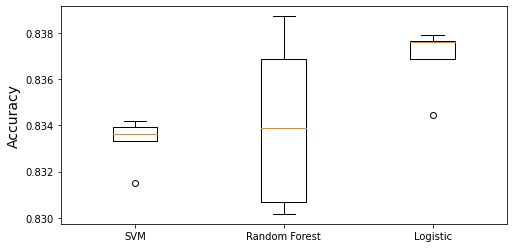

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
# plt.plot([1]*10, svm_scores, ".")
# plt.plot([2]*10, forest_scores, ".")
# plt.plot([3]*10, logistic_scores, ".")

plt.boxplot([svm_scores, forest_scores, logistic_scores], labels=("SVM","Random Forest", "Logistic"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()